# ওপেনসিভি + পাইথনে ইমেজ প্রসেসিং
## ইমেজ কে ধরে বেঁধে কম্পিউটারের মেমোরিতে আনা, আবার বের করে দেয়া। 
## মানে রিড রাইট আরকি! 

## এইবার সত্যি সত্যি কোড দেখাবো 😁

আমরা ওপেনসিভি ইন্সটল করলাম কিন্তু কাজে লাগালাম না ব্যাপারটা কেমন দেখায়? চলেন কাজে লাগাই। এই অধ্যায়ে দেখা যাক কীভাবে ইমেজ রিড করতে হয়, একটা উইন্ডোতে দেখাতে হয় এবং কীভাবে সেটা সেভ করতে হয় । একাধিক উপায়ে কাজগুলো করা যায় । চলুন দেখা যাক! 

 **ভালো হয় যদি আপনি আপনার IDE বা এডিটরে কোড লিখে প্র্যাকটিস করেন। শুধু দেখে গেলে কোন কাজে আসবে না ।** 

## ইনপুট ইমেজ কই? 

সিরিজের রুট ডিরেক্টরিতে images নামের ফোল্ডার আছে । আমি সেগুলো দিয়ে কাজ করবো । আপনি চাইলে আপনার পছন্দের ছবি নিয়ে কাজ করতে পারেন।

## ফার্স্ট রুল অফ দা বিজনেস! মডিউল ইম্পোর্ট করা 

সবার প্রথম কাজ । আমার কিছু পাইথন মডিউল দরকার হবে , ওপেন্সিভি তো লাগবেই সাথে আরো কিছু মডিউল লাগবে । সেগুলো অ্যানাকন্ডার সাথে বিল্ট ইন হিসেবে আসে । এগুলো হচ্ছে numpy এবং maplotlib

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as pt # আস্ত মডিউলের সব ইম্পোর্ট করা বাজে প্র্যাকটিস। 

## ইমেজ রিড করা 

ইমেজ রিড করার জন্য আমরা cv2 এর imread() মেথড টা নিয়ে কাজ করবো । imread() ২ টা আর্গুমেন্ট নেয় । একটা হচ্ছে ইমেজ ফাইলের নাম। আরেকটা হচ্ছে রিড মোড ফ্ল্যাগ। 

রিড মোড ফ্ল্যাগ গুলো হচ্ছেঃ 

cv2.IMREAD_UNCHAGED => ছবি যেমন কালারে আছে তেমন ই লোড করা । 
cv2.IMREAD_GRAYSCALE => গ্রে স্কেল মোডে লোড করা 
cv2.IMREAD_COLOR => রঙ্গিন হিসেবে লোড করা । 

__বিঃদ্রঃ__ এই অধ্যায়টা সহজ সরল রাখার সার্থে আমরা রঙিন ছবি লোড করছি না । কেন করছি না সেটা পরের অধ্যায়ে রঙিন এবং গ্রে স্কেল ইমেজের পার্থক্য নিয়ে কথা বলার সময় জানাবো । এখন আসেন ইমেজ লোড করি! 


In [2]:
image = cv2.imread('../images/bangladesh.jpg', cv2.IMREAD_GRAYSCALE)

## মোমেন্ট অফ ট্রুথ, ইমেজ আসলেই ম্যাট্রিক্স কিনা ! 

In [3]:
print(image)

[[141 150 134 ..., 118 132 111]
 [134 146 134 ..., 117 133 116]
 [137 149 145 ..., 112 128 113]
 ..., 
 [ 67  55  82 ..., 134  92  99]
 [ 59  63  73 ..., 146 110 102]
 [ 58  61  71 ..., 149 116 109]]


## অতিকায়া ম্যাট্রিক্স! 

তো যা বলেছিলাম আরকি । ইমেজ একটা ম্যাট্রিক্স। কিন্তু ম্যাট্রিক্স হিসেবে লোড করে কি হচ্ছে? আমি তো দেখতে পাচ্ছি না ছবিটা ঠিক ঠাক এসেছে কিনা ! আসুন এবার দেখি ইমেজ এর কি অবস্থা! 

## ইমেজ দেখানোর ২ পদ্ধতি! <বিফলে মূল্য ফেরত যাবে কিনা আমি জানি না> 

### প্রথম পদ্ধতিঃ 
- cv2 এর গ্রাফিকাল উইন্ডো দিয়ে ইমেজ লোড করা যায় । 
- এর একটা অসুবিধা হচ্ছে যে, এইটা অনেক বেশি প্ল্যাটফর্ম ডিপেন্ডেন্ট (মানে অপারেটিং সিস্টেম ডিপেন্ডেন্ট) এবং বড় সাইজের ইমেজ লোড করতে ঝামেলা হয় । 
- এছাড়া আরেকটা ঝামেলা হচ্ছে জিনিসটা একসাথে একটা বেশি ইমেজ দেখাতে পারে না । 
- কোড লিখে সেভ করার ব্যবস্থা না রাখলে এবং উইন্ডো কুইট করার জন্য কোড না লিখলে প্রোগ্রাম হ্যাং করে (কি ঝামেলা!) 

তাও ন্যাটিভ মেথড হিসেবে দেখাচ্ছি। 

In [4]:
cv2.imshow('ঝামেলা কইরা ইমেজ লোডাই!', image)

k = cv2.waitKey(0) # ০ দিলে সে সারাজীবন উইন্ডোজ ঝুলিয়ে রাখবে । অন্য ভ্যালু দিলে ঐ সময় পরে নিজেই বন্ধ হয়ে যাবে 
if k == 27 or k == ord('q'): # মানে ESC অথবা q দিলে উইন্ডো চলে যাবে 
    cv2.destroyAllWindows()

###  এই জিনিস মেলা ঝামেলা করে! আচ্ছা সেভ করবো ক্যামনে? 

সেভ করার জন্য আপনাকে cv2.destroyAllWindows() এর আগে লিখতে হবে - 

cv2.imwrite(fileName, image)

অর্থাৎ ফাইলনেম আর ম্যাট্রিক্স টা সাপ্লাই দিলেই হচ্ছে । 

In [5]:
cv2.imwrite('out.jpg', image) # আলাদাই দিলাম! 

True

### আমরা ঝামেলা না করি! সহজ উপায়ে যাই? 
### pyplot দিয়ে সহজে করা যায়, ঝামেলাও নাই আর এত কিছু করাও লাগে না । 

In [4]:
pt.imshow(image, cmap='gray')

pyplot কে এক্সট্রা আর্গুমেন্ট হিসেবে ইমেজের কালার কেমন সেটা বলে দেয়া লাগে । যেহেতু গ্রে স্কেল , তাই cmap='gray'

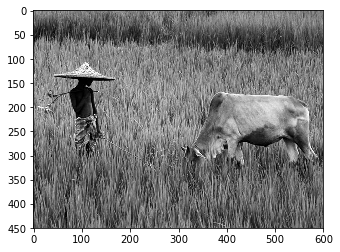

In [5]:
pt.show('image',image) # উইন্ডোর নাম আর ম্যাট্রিক্স দিলেই হচ্ছে! 

### আউটপুট কি? 

image টাইটেল ওয়ালা একটা উইন্ডো আসবে । তাতে ইমেজটা দেখা যাবে । চাইলে সেভ ও করা যাবে । বাটন আসবে। আবার সুন্দর রেজুলেশন ও দেখিয়ে দিচ্ছে গ্রাফ করে ! তো বাকি উদাহরণ গুলো দেখানোর জন্য আমরা pyplot দিয়েই কাজ করবো । 

## রিড রাইট শেষ! 

এবং অসামান্য সফলতার সাথে আপনি কোড লিখে ইমেজ রিড এবং রাইট করা শিখে ফেলেছেন। __হাই ফাইভ!__ দেখা হবে পরের অধ্যায়ে! 